In [ ]:
!pip install yahoo_fin
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.9 MB/s eta 0:00:00
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1257 sha256=fea75a05ecadaefa1b13b0c3f53806e28d51b09018efefb3631df97b757aff45
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24570 sha256=3cfa28b0b25d6fc3682dad16cbe36740d79601dbf7cedd2fc12b1952aa2df8b5
  Stored in directory: /root/.cache/pip/wheels/70/4b/f0/ea

Predicted Stock Prices:
2023-06-07: 323.82267733844145
2023-06-08: 316.3969809030819
2023-06-09: 324.077458742142
Mean Squared Error: 35.32184935711692
Mean Absolute Percentage Error (MAPE): 0.014467510294078719


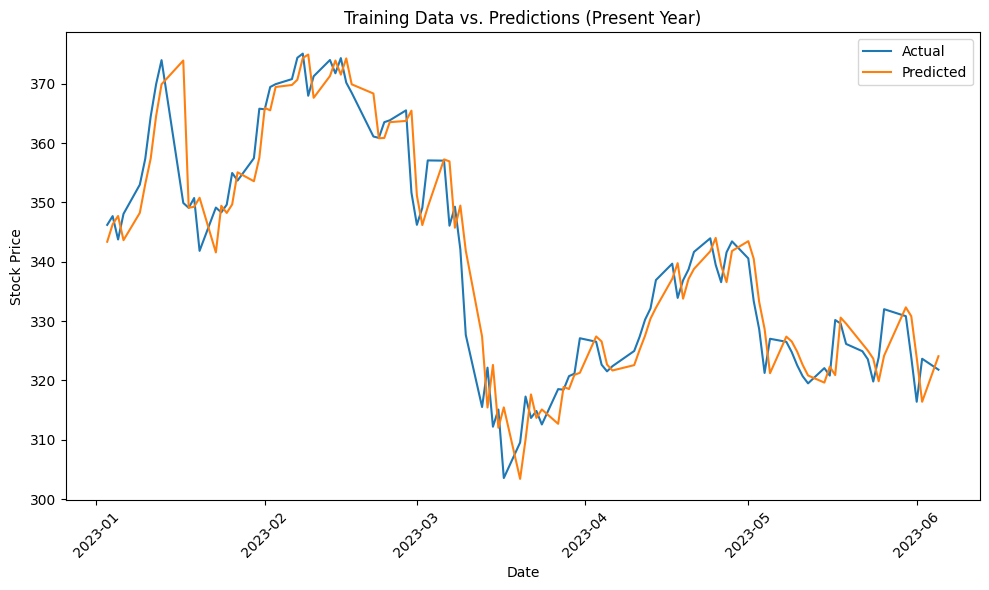

In [ ]:
# Import necessary libraries
from yahoo_fin import stock_info as yf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the number of days to predict forward
n_days_forward = 3

# Get today's date and the date three years ago
end_date = datetime.date.today()
start_date = end_date - datetime.timedelta(days=3 * 365)

# Define the stock symbol
stock_symbol = 'GS'  # Replace with your desired stock symbol

# Get the historical stock data from Yahoo Finance
stock_data = yf.get_data(stock_symbol, start_date, end_date)

# Extract the 'close' prices as the target variable
y = stock_data['close'].values

# Generate the features (previous 'n_days_forward' closing prices)
X = []
for i in range(n_days_forward, len(stock_data)):
    X.append(y[i - n_days_forward:i])
X = np.array(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y[n_days_forward:], test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions for the next 'n_days_forward' days
future_dates = [end_date + datetime.timedelta(days=i) for i in range(1, n_days_forward + 1)]
future_dates = [date.strftime('%Y-%m-%d') for date in future_dates]

future_prices = model.predict(X[-n_days_forward:])
predictions = list(zip(future_dates, future_prices))

# Print the predicted stock prices for the next 'n_days_forward' days
print("Predicted Stock Prices:")
for date, price in predictions:
    print(f"{date}: {price}")

# Evaluate the model's performance on the testing set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Percentage Error (MAPE):", mape)

# Plotting the training data vs. predictions for the present year
train_dates = stock_data.index[n_days_forward:]
train_actual = y[n_days_forward:]
train_predicted = model.predict(X)

# Filter the data for the present year
present_year = datetime.date.today().year
present_year_start = pd.Timestamp(datetime.date(present_year, 1, 1))
present_year_dates = train_dates[train_dates >= present_year_start]
present_year_actual = train_actual[train_dates >= present_year_start]
present_year_predicted = train_predicted[train_dates >= present_year_start]

plt.figure(figsize=(10, 6))
plt.plot(present_year_dates, present_year_actual, label='Actual')
plt.plot(present_year_dates, present_year_predicted, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Training Data vs. Predictions (Present Year)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

